# <span style="color:teal">**Exploratory Analysis of Iris Data**</span>

### **Author:** Kami Denny
### **Purpose:** Perform exploratory data analysis (EDA) to uncover patterns and insights on Iris Dataset
### **Date:** February 2nd, 2025

<hr style="border: 1px solid teal;">

###  <span style="color:teal">**Introduction:**</span>

#### In this Jupyter notebook, I plan to investigate the impact of sepal size on petal size across different species of Iris. The species under consideration are setosa, versicolor, and virginica. Specifically, I will examine how the sepal area, calculated from sepal length and sepal width, influences petal width, petal length, and petal area. By analyzing these three petal dimensions for each species, I aim to gain a comprehensive understanding of the relationship between sepal and petal sizes. My hypothesis is that an increase in sepal width will correspond to a larger petal area for all Iris species.

<hr style="border: 1px solid teal;">

#### 1. Imports

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

<hr style="border: 1px solid teal;">

#### 2. Load Data

In [12]:
# Load the Iris dataset into pandas DataFrame
# We will use this data to analyze the relationship between sepal size and petal size.
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<hr style="border: 1px solid teal;">

#### 3. Initial Data Inspection

In [13]:
# Inspect the shape of the DataFrame with shape attribute
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

# Get the unique values in a specific column
unique_species = iris_df['species'].unique()
print(f"Unique values in the 'species' column: {unique_species}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Unique values in the 'species' column: ['setosa' 'versicolor' 'virginica']


#### <span style="color:teal">**Summary of Initial Inspection**</span>
##### - The data doesn't have any null values in the 150 total attributes.
##### - The DataFrame contains 5 columns: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, and `species`.
##### - The first four columns are numerical, and the `species` column is categorical.
##### - The unique values in the `species` column are: `setosa`, `versicolor`, and `virginica`.

<hr style="border: 1px solid teal;">

#### 4. Initial Descriptive Statistics

In [14]:
# Inspect summary statistics for numerical columns:
#`sepal_length`, `sepal_width`, `petal_length`, `petal_width`
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<hr style="border: 1px solid teal;">

#### 5. Initial Data Distribution for Numerical Columns

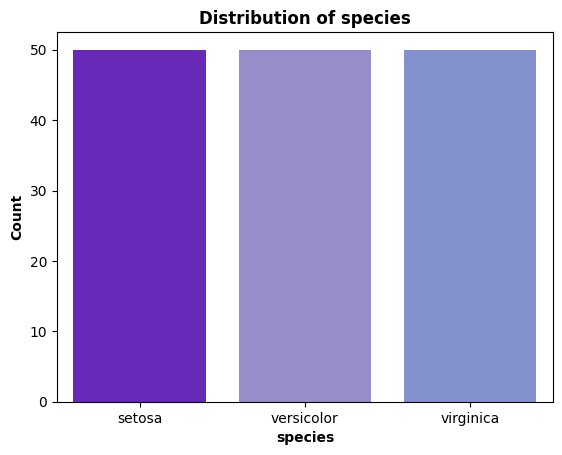

In [15]:
# Inspect value counts by categorical column
iris_df['species'].value_counts()

# Define the corrected color dictionary
color_dict = {
    'setosa': '#6511d0',
    'versicolor': '#8f83d3',
    'virginica': '#778ad9'
}

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot with specified colors
    sns.countplot(x=col, data=iris_df, hue=col, palette=color_dict, legend=False)
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.show()

#### <span style="color:teal">**Summary of Distribution of Species**</span>
##### - Each species (`setosa`, `versicolor`, and `virginica`) has 50 features.
##### - The Iris dataset contains an equal number of samples for each species.
##### - This balance ensures that the dataset is not biased towards any particular species.

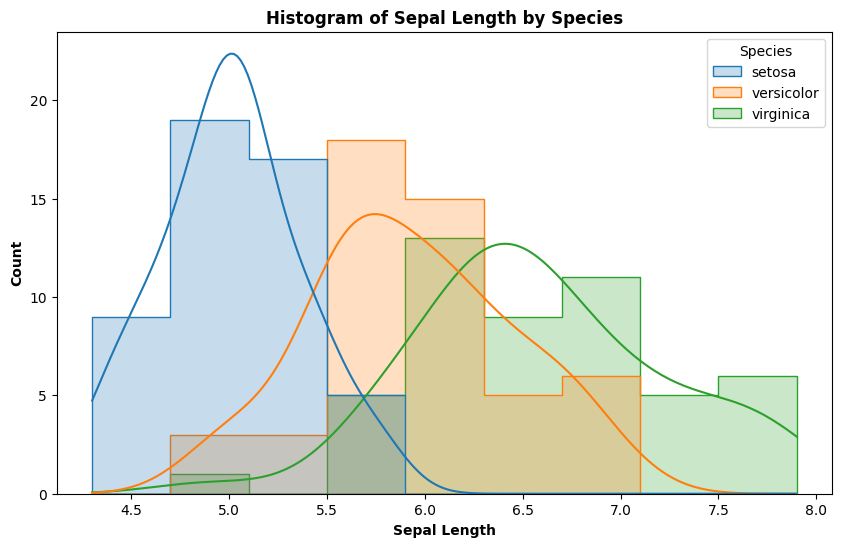

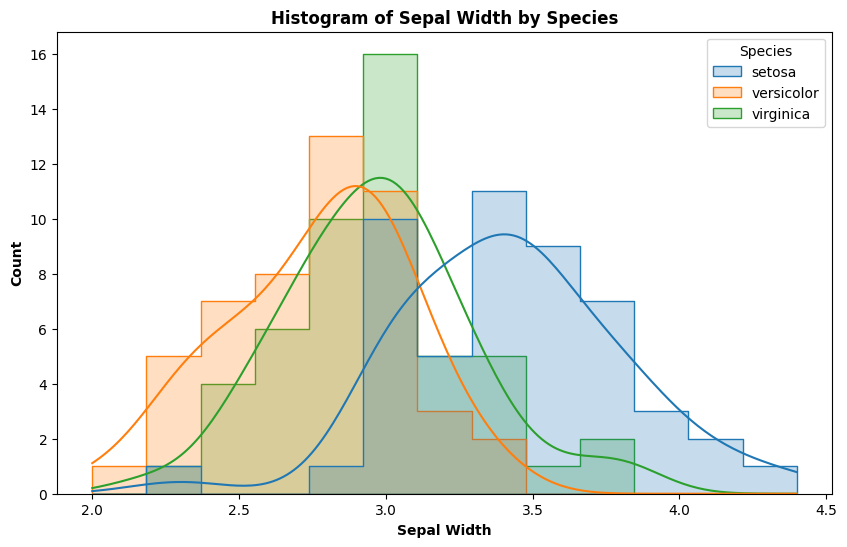

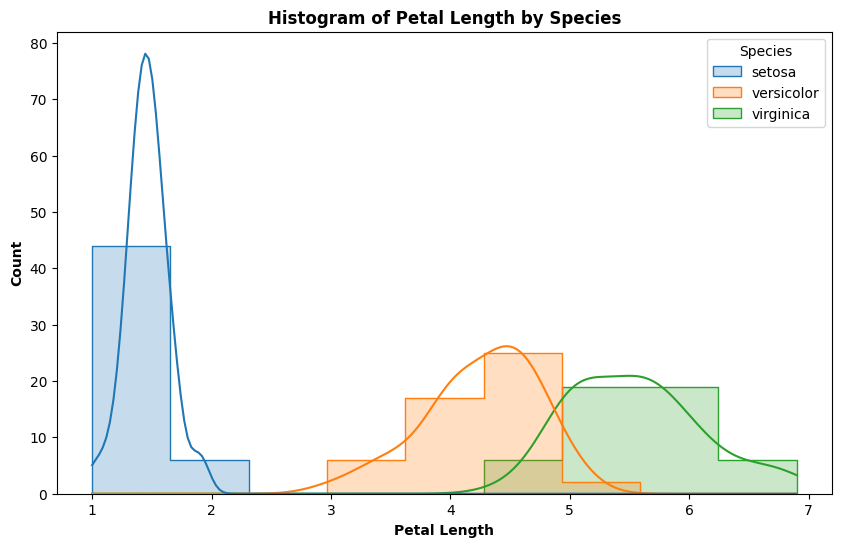

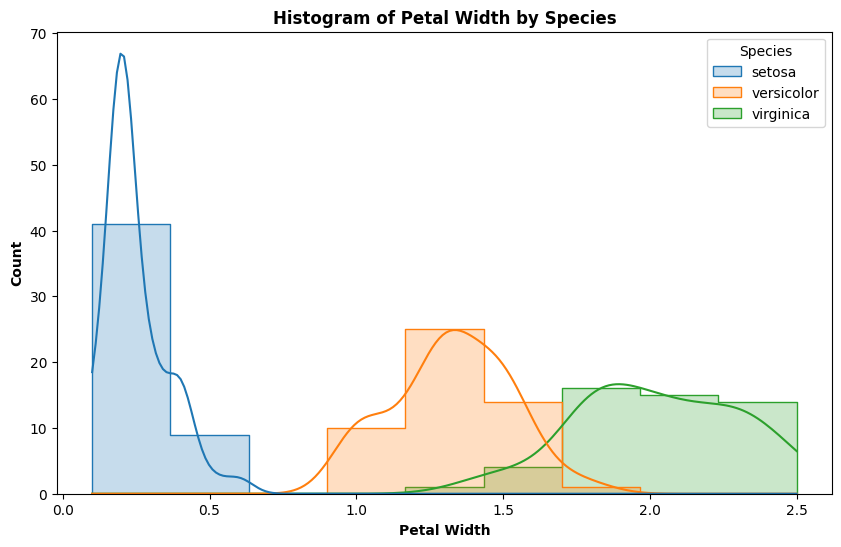

In [24]:
# List of numerical columns
numerical_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create histograms for each numerical column with a trend line and hue set to Species
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=iris_df, x=col, hue='Species', kde=True, element='step')
    plt.title(f'Histogram of {col} by Species', fontweight='semibold')
    plt.xlabel(col, fontweight='semibold')
    plt.ylabel('Count', fontweight='semibold')
    plt.show()

#### <span style="color:teal">**Summary of Distribution of Column by Species**</span>
##### - `Setosa` is the smallest species in terms of Sepal Length, Petal Length, and Petal Width compared to `Versicolor` and `Virginica`. `Setosa` has the largest Sepal Width compared to the other species despite being smaller in every other column.
##### - `Virginica` is the largest species in terms of Sepal Length, Petal Length, and Petal Width compared to `Setosa` and `Versicolor`. Virginica consistently shows larger dimensions.
##### - `Versicolor` is the Intermediate species in terms of Sepal Length, Petal Length, and Petal Width compared to `Setosa` and `Virginica`. `Versicolor` has the smallest Sepal Width. 

##### <span style="color:teal">**Insights**</span>
##### - Despite `Setosa` being generally smaller in most dimensions, it has a larger sepal width,  which provides valuable context for interpreting subsequent analyses. 
##### - `Virginica` consistently exhibits larger dimensions, prompting further investigation to determine if  this trend persists when examining the relationship between sepal and petal sizes. 
##### - Additionally, `Versicolor` follows a similar pattern to Virginica, despite being smaller overall

<hr style="border: 1px solid teal;">

#### 6. Initial Data Transformation and Feature Engineering

In [16]:
# Renaming current columns
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
iris_df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
iris_df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
iris_df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)
iris_df.rename(columns={'species': 'Species'}, inplace=True)

# Creating new area columns
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']
iris_df['Petal Area'] = iris_df['Petal Length'] * iris_df['Petal Width']

# Inspect first few rows of the DataFrame with Updates
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Sepal Area,Petal Area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


#### <span style="color:teal">**Summary of Data Frame Changes**</span>
##### - Updated all column names to follow proper case convention.
##### - Added two new columns: Petal Area and Sepal Area.

<hr style="border: 1px solid teal;">

#### 7. Initial Visualizations

##### <span style="color:teal">**A pairplot provides a grid of scatter plots for each pair of numerical columns in the dataset, colored by species:**</span>

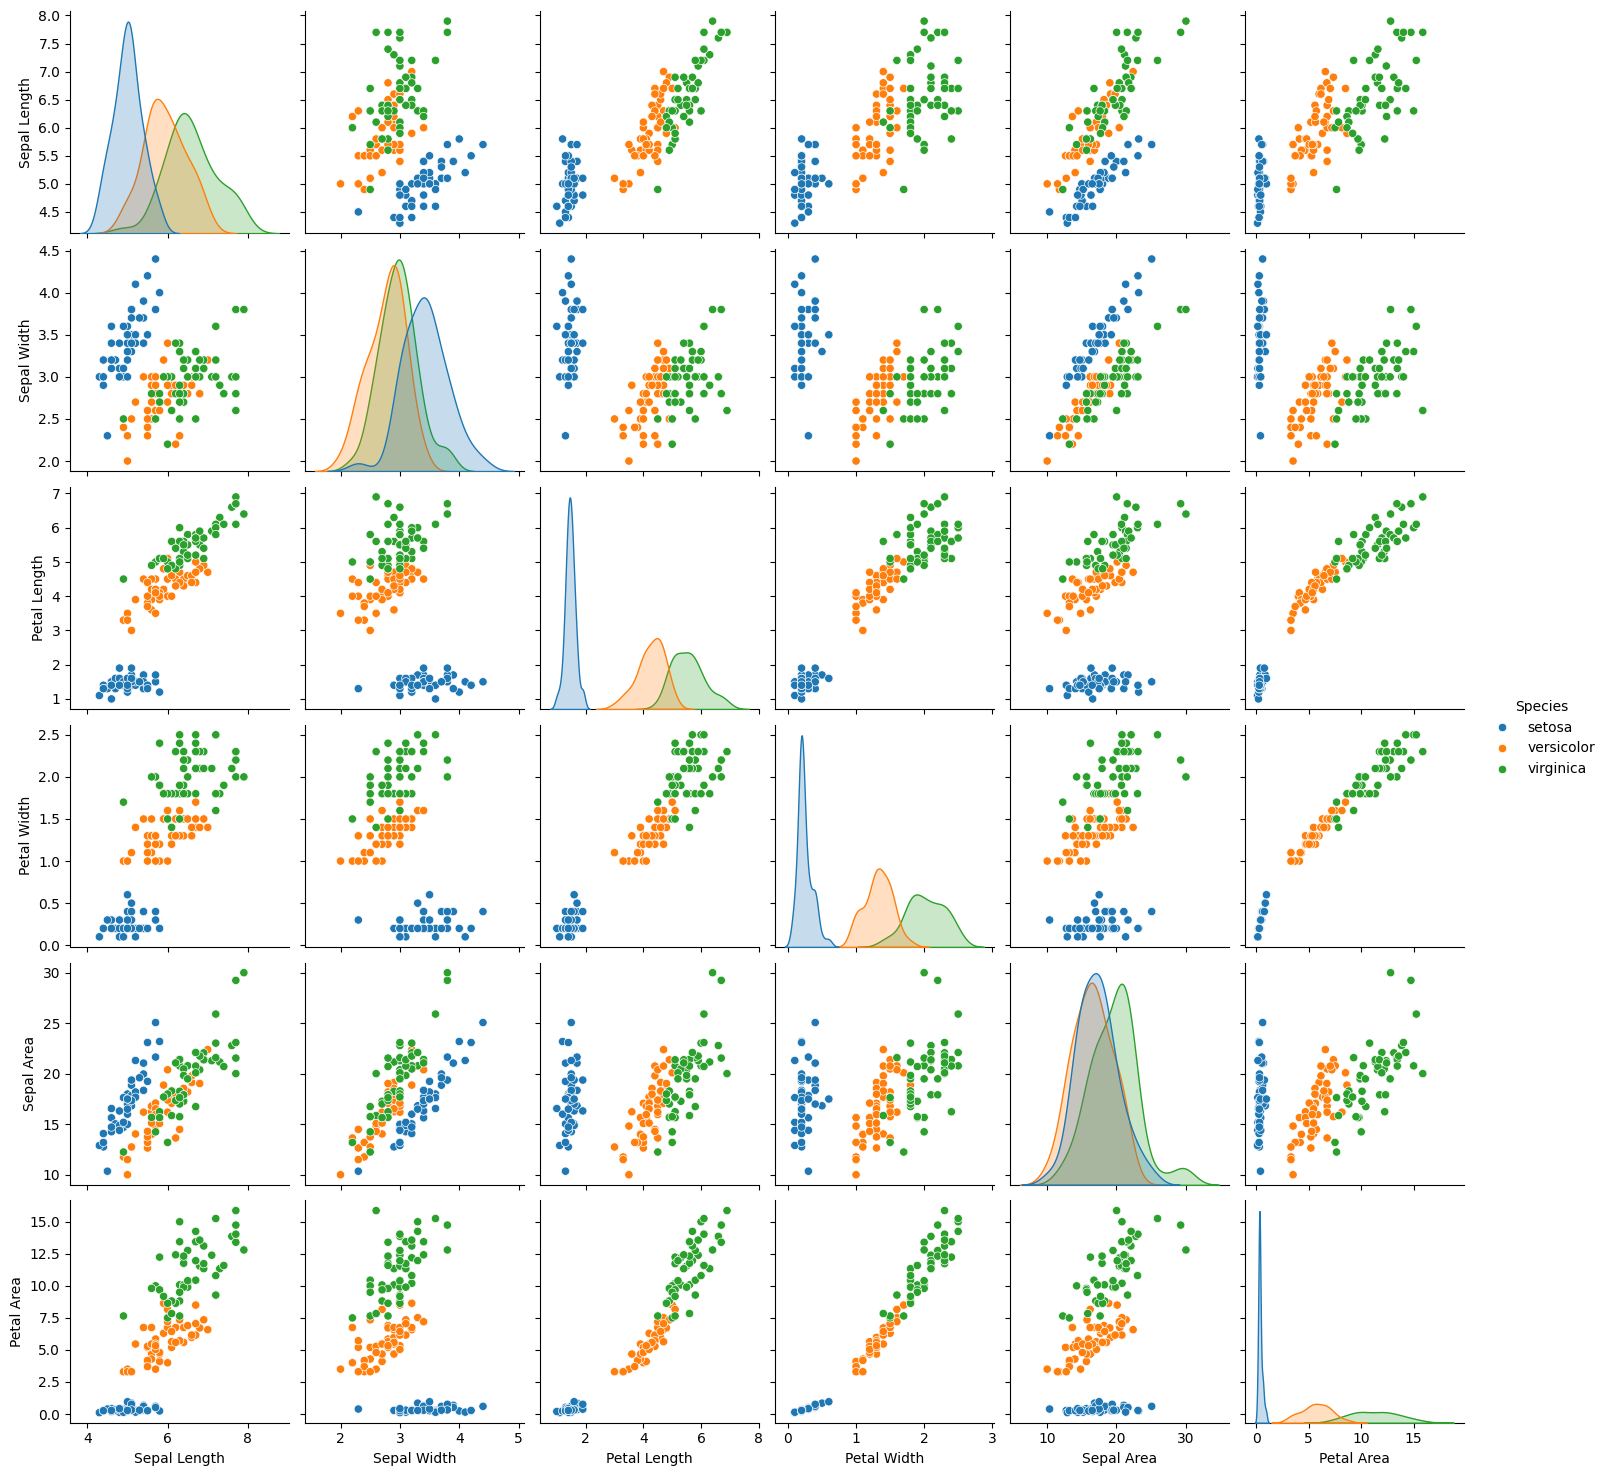

In [30]:
# Create a pairplot of the Iris dataset with hue set to Species
sns.pairplot(iris_df, hue='Species')

# Show all plots
plt.show()

##### <span style="color:teal">**I explored the relationships between Sepal Area and various petal fields, and created scatter plots with trend lines for each species:**</span>

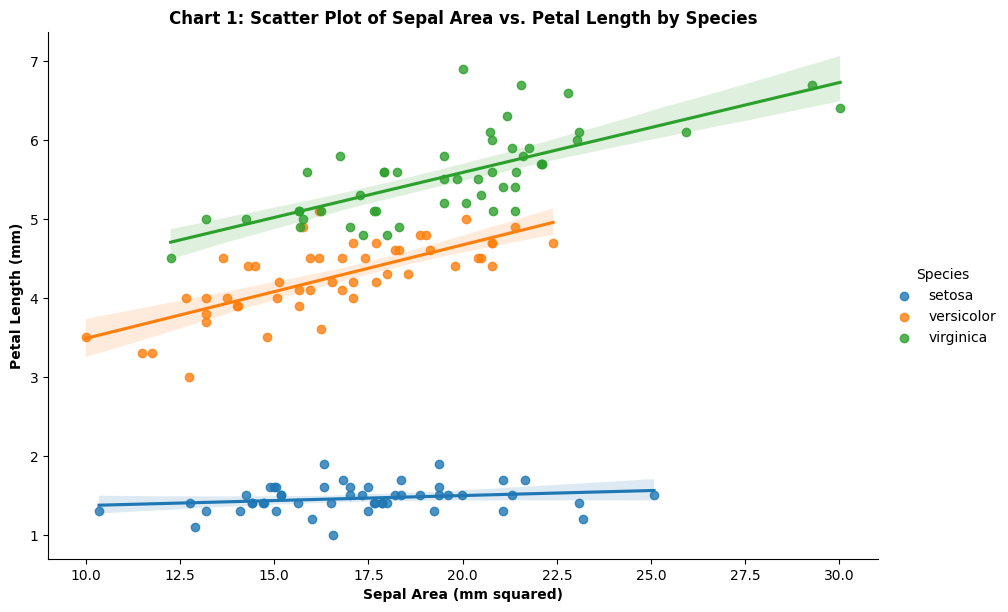

In [26]:
sns.lmplot(data=iris_df, x='Sepal Area', y='Petal Length', hue='Species', markers='o', height=6, aspect=1.5)
plt.title('Chart 1: Scatter Plot of Sepal Area vs. Petal Length by Species', fontweight='semibold')
plt.xlabel('Sepal Area (mm squared)', fontweight='semibold')
plt.ylabel('Petal Length (mm)', fontweight='semibold')
plt.show()

#### <span style="color:teal">**Summary of Sepal Area vs. Petal Length**</span>
##### - `Versicolor` and `Virginica`: For both species, there is a positive trend and a noticeable correlation between larger sepal area and longer petal length.
##### - `Setosa`: As the sepal area increases, it has minimal effect on the petal length.

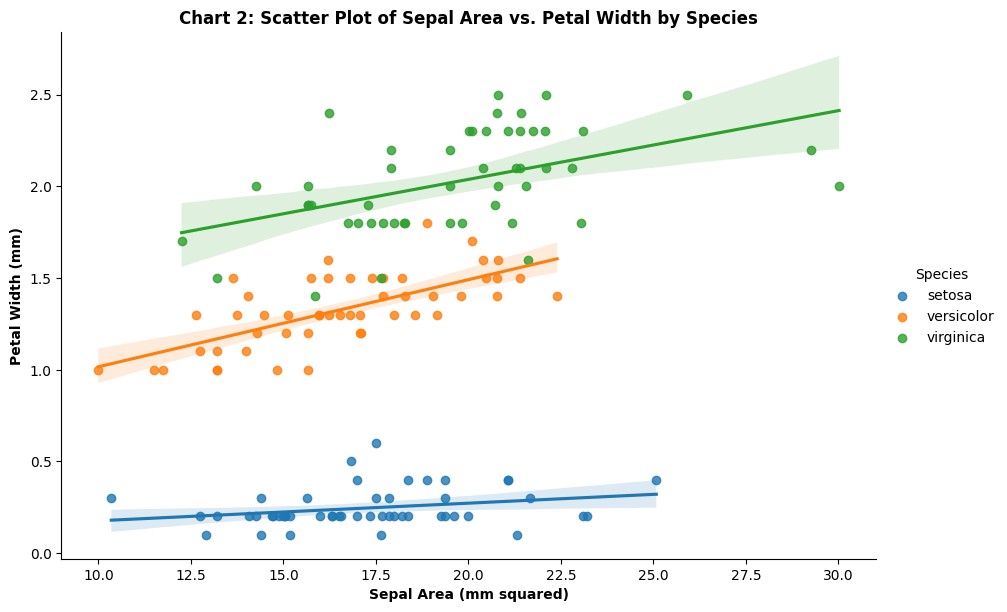

In [27]:
sns.lmplot(data=iris_df, x='Sepal Area', y='Petal Width', hue='Species', markers='o', height=6, aspect=1.5)
plt.title('Chart 2: Scatter Plot of Sepal Area vs. Petal Width by Species', fontweight='semibold')
plt.xlabel('Sepal Area (mm squared)', fontweight='semibold')
plt.ylabel('Petal Width (mm)', fontweight='semibold')
plt.show()

#### <span style="color:teal">**Summary of Sepal Area vs. Petal Width**</span>
##### - `Versicolor` and `Virginica`: For both species, there is a positive trend and a noticeable correlation between larger sepal area and a larger petal width.
##### - `Setosa`: As the sepal area increases, it has a small effect on the petal width. The trend is slightly positive but not as pronounced as in Versicolor or Virginica.

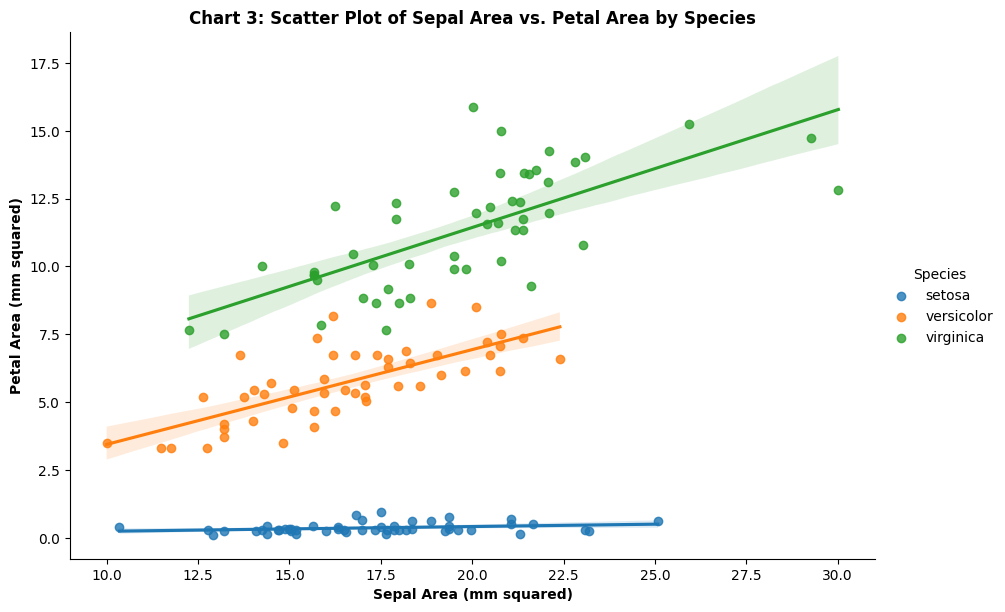

In [28]:
sns.lmplot(data=iris_df, x='Sepal Area', y='Petal Area', hue='Species', markers='o', height=6, aspect=1.5)
plt.title('Chart 3: Scatter Plot of Sepal Area vs. Petal Area by Species', fontweight='semibold')
plt.xlabel('Sepal Area (mm squared)', fontweight='semibold')
plt.ylabel('Petal Area (mm squared)', fontweight='semibold')
plt.show()

#### <span style="color:teal">**Summary of Sepal Area vs. Petal Area**</span>
##### - `Versicolor` and `Virginica`: For both species, there is a positive trend and a noticeable correlation between larger sepal area and a larger petal area.
##### - `Setosa`: As the sepal area increases, it has no effect on the petal area.

<hr style="border: 1px solid teal;">

###  <span style="color:teal">**Insights & Summary:**</span>

#### **Key Insights**

#### - `Setosa`: Despite being generally smaller in most dimensions, Setosa has a larger sepal width. However, increases in sepal area have minimal effect on petal length and width, and no effect on petal area.

#### - `Versicolor` and `Virginica`: Both species exhibit a positive trend and noticeable correlation between larger sepal area and larger petal dimensions (width, length, and area). This indicates that as the sepal area increases, the petal size also tends to increase for these species.

#### **Summary**

#### The exploratory data analysis revealed distinct patterns in how sepal size influences petal size among different Iris species. `Setosa` shows minimal correlation between sepal area and petal dimensions, while `Versicolor` and `Virginica` demonstrate a clear positive relationship. These findings support the hypothesis that larger sepal width is associated with larger petal area, for `Versicolor` and `Virginica`. `Setosa` proves my findings false that among all species a Larger Sepal has a correlation with a Large Petal.